In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [167]:
class SVM:
    def __init__(self, nfeatures):
        self.nfeatures = nfeatures
        self.weights = np.random.randn(nfeatures)
        self.weights = np.resize(self.weights, (nfeatures, 1))
        
    def _compute_cost_grads(self, lambd, x, y):
        grad = (lambd * self.weights)
        loss = (1 - (y * np.dot(x, self.weights)))[0]
        if loss < 0:
            loss = 0
            grad -= np.resize(y*x, (self.nfeatures, 1))
        loss += (0.5 * lambd * np.sum(self.weights ** 2))
        return (loss, grad)

    def fit(self, X, Y, lr=0.01, kernel="rbf", lambd=0.1, epochs=10):
        errors = []
        for _ in range(epochs):
            i = np.random.randint(0, len(X))
            loss, grad = self._compute_cost_grads(lambd, X, Y)
            self.weights -= lr * grad
            errors.append(loss)
            #print(loss)
        plt.plot(range(epochs), errors)
        plt.show()

In [168]:
columns = ["F1", "F2", "F3", "F4", "T"]
raw_df = pd.read_csv("data.txt", header=None, names=columns, sep=",")
raw_df.insert(0, "F0", np.ones(len(raw_df)), True) 
raw_df = raw_df.sample(n=len(raw_df), random_state=23)
Y = np.array(raw_df["T"])
for i in range(len(Y)):
    Y[i] = (-1 if Y[i] == 0 else 1)
Y = np.resize(Y, (Y.shape[0], 1))
X = np.array(raw_df[["F0", "F1", "F2", "F3", "F4"]])

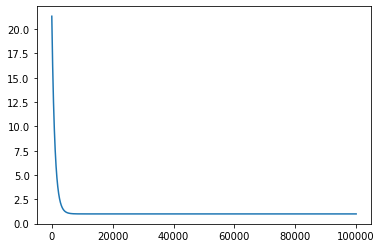

In [169]:
model = SVM(X.shape[1])
model.fit(X, Y, lr=0.01, epochs=10000)